#  Zillow Project: Data Preparation
---

## MVP Objectives
- Remove/Impute missing values.
- Create functions to reproduce prepared dataset
- Move functions to a seperate file named `prepare.py`


In [30]:
# Import libraries to manipulate data structures and visualize numeric data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the zillow dataset and assign to a variable
df = pd.read_csv('zillow.csv')

In [3]:
# My first dataset with +2 million rows :)
df.shape

(2985217, 59)

In [4]:
# Initial look at our zillow dataset
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


Our dataset has a bunch of missing values! This is only the first 5 rows! Let's see how many values are missing in each column.

In [5]:
# Using `isnull()` and `notnull()` we can calculate the number of missing values and non-null values.
nulls = df.isnull().sum()
non_nulls = df.notnull().sum()

# Add missing values and non-null values together to get the total number values in each column.
total_values = nulls + non_nulls

# Create a variable to store the percentage of missing values in each column.
pct_missing = (nulls/total_values).sort_values(ascending=False)

# Perform formatting to clearly see the percentage of missing values in each column.
pct_missing_chart = pct_missing.apply("{0:.2%}".format)

# Display table to the user showing the percentage of missing values in each column.
print('Percentage of values missing per column')
print('-' * 39)
print(f"{pct_missing_chart}")

Percentage of values missing per column
---------------------------------------
storytypeid                     99.95%
basementsqft                    99.95%
yardbuildingsqft26              99.91%
fireplaceflag                   99.83%
architecturalstyletypeid        99.80%
typeconstructiontypeid          99.77%
finishedsquarefeet13            99.74%
buildingclasstypeid             99.57%
pooltypeid10                    99.43%
decktypeid                      99.42%
finishedsquarefeet6             99.28%
poolsizesum                     99.06%
pooltypeid2                     98.89%
hashottuborspa                  98.32%
taxdelinquencyflag              98.11%
taxdelinquencyyear              98.11%
yardbuildingsqft17              97.27%
finishedsquarefeet15            93.63%
finishedsquarefeet50            93.17%
finishedfloor1squarefeet        93.17%
fireplacecnt                    89.51%
threequarterbathnbr             89.40%
pooltypeid7                     83.05%
poolcnt                

Before we move ahead let's drop columns with more than __9.14%__ of values missing. Imputing values in columns with > 9.14% of values missing is a waste of time. We need to make our dataset _Robust™_.
- If we can impute values in columns: `lotsizesquarefeet`, `finishedsquarefeet12`, great. If not, we can drop them.

In [6]:
columns_to_drop = pct_missing[pct_missing > .3358].index.to_list()

In [7]:
df_subset = df.drop(columns=columns_to_drop)

In [8]:
# My eyes are happy
df_subset.sample(10)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
1385915,1385915,17194745,2.5,3.0,2.5,2741.0,2741.0,6111.0,2.0,34175292.0,...,2061.0,96351.0,9.0,2002.0,338740.0,534383.0,2016.0,195643.0,6058.22,6.111006e+13
501473,501473,12885400,3.0,3.0,3.0,1300.0,1300.0,6037.0,3.0,34045300.0,...,3101.0,96506.0,0.0,1993.0,84882.0,169764.0,2016.0,84882.0,2170.05,6.037403e+13
2837461,2837461,11571356,1.0,1.0,1.0,637.0,637.0,6037.0,1.0,34039613.0,...,3101.0,96151.0,0.0,1951.0,81220.0,406100.0,2016.0,324880.0,5109.20,6.037702e+13
64231,64231,11669581,5.0,4.0,5.0,4764.0,4764.0,6037.0,5.0,34062513.0,...,3101.0,96120.0,0.0,1956.0,1084132.0,5420666.0,2016.0,4336534.0,87977.27,6.037262e+13
1807774,1807774,11083932,3.0,4.0,3.0,2971.0,2971.0,6037.0,3.0,34254214.0,...,3101.0,96355.0,0.0,1997.0,361486.0,526037.0,2016.0,164551.0,6543.07,6.037111e+13
1489374,1489374,14531249,2.0,2.0,2.0,1028.0,1028.0,6059.0,2.0,33501100.0,...,1286.0,96969.0,5.0,1963.0,139990.0,2770579.0,2016.0,2630589.0,28616.24,6.059042e+13
922300,922300,14447738,2.0,3.0,2.0,1106.0,1106.0,6059.0,2.0,33445738.0,...,1286.0,96956.0,12.0,1950.0,35445.0,3003050.0,2016.0,2967605.0,31471.54,6.059042e+13
944685,944685,11828379,3.0,5.0,3.0,1909.0,1909.0,6037.0,3.0,34057369.0,...,3101.0,96496.0,0.0,1961.0,137464.0,304069.0,2016.0,166605.0,3962.23,6.037482e+13
1996678,1996678,14614532,3.0,2.0,3.0,1477.0,1477.0,6059.0,3.0,33644095.0,...,1286.0,96996.0,0.0,1986.0,148372.0,431268.0,2016.0,282896.0,4458.46,6.059032e+13
364343,364343,12167908,1.0,2.0,1.0,829.0,829.0,6037.0,1.0,34203144.0,...,3101.0,96265.0,0.0,1952.0,21525.0,215347.0,2016.0,193822.0,2538.77,6.037460e+13


### Subset of Zillow data
- Dropped columns missing more than 9.14% of values

In [9]:
# Will return. Retrieving and reproducing data dictionary for these columns.
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   parcelid                      int64  
 2   bathroomcnt                   float64
 3   bedroomcnt                    float64
 4   calculatedbathnbr             float64
 5   calculatedfinishedsquarefeet  float64
 6   finishedsquarefeet12          float64
 7   fips                          float64
 8   fullbathcnt                   float64
 9   latitude                      float64
 10  longitude                     float64
 11  lotsizesquarefeet             float64
 12  propertycountylandusecode     object 
 13  propertylandusetypeid         float64
 14  rawcensustractandblock        float64
 15  regionidcity                  float64
 16  regionidcounty                float64
 17  regionidzip                   float64
 18  roomcnt               

In [28]:
# Create a function to clean our Zillow dataset
# Note: Create a wrangle function to acquire and prepare the dataset
from sklearn.model_selection import train_test_split

def prepare_zillow(df):
    '''
    Signature: prepare_zillow(df) -> pandas.core.frame.DataFrame
    Docstring:
    Prepare the zillow dataset for data EDA

    Return DataFrame of zillow dataset


    Parameters
    ----------
    df : pandas.core.frame.DataFrame
    df is the Zillow dataset stored as `zillow.csv`


    Returns
    -------
    DataFrame of the zillow dataset
    DatafFarmes of Train, Validate, Test splits of the zillow dataset for model testing
    
    How to run
    -------
    df, train, validate, test = prepare_zillow(df)
    
    Examples
    --------
    To copy the code hold ALT + SHIFT and drag your cursor from the first line to the last.

    >>> df = pd.read_csv('zillow.csv')
    >>>
    >>> nulls = df.isnull().sum()
    >>> non_nulls = df.notnull().sum()
    >>> total_values = nulls + non_nulls
    >>>
    >>> pct_missing = (nulls/total_values).sort_values(ascending=False)
    >>> pct_missing_chart = pct_missing.apply("{0:.2%}".format)
    >>>
    >>> print('Percentage of values missing per column')
    >>> print('-' * 39)
    >>> print(f"{pct_missing_chart}")
    '''
    
    # 1. Drop columns with missing values
    # Calculate the number of missing values and non-null values.
    nulls = df.isnull().sum()
    non_nulls = df.notnull().sum()

    # Get the total number values in each column.
    total_values = nulls + non_nulls

    # Create a variable to store the percentage of missing values in each column.
    # .3358 is a hard coded value from the original analysis.
    # To reproduce use the code in the docstring
    pct_missing = nulls/total_values
    columns_to_drop = pct_missing[pct_missing > .3358].index.to_list()
    
    # drop columns missing more than 33.58% of data.
    df = df.drop(columns=columns_to_drop)
    df = df.loc[(df['propertylandusetypeid'] == 261) | (df['propertylandusetypeid'] == 262) | (df['propertylandusetypeid'] == 273) | (df['propertylandusetypeid'] == 279)]
    
    
    train_validate, test = train_test_split(df, train_size=0.8, random_state=222)
    train, validate = train_test_split(train_validate, train_size=0.75, random_state=222)
    
    return df, train, validate, test

In [11]:
df = prepare_zillow(df)
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [17]:
df.shape

(2152864, 26)

In [18]:
df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'],
      dtype='object')

In [26]:
df, train, validate, test = prepare_zillow(df)
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
305153,305153,12290674,2.0,3.0,2.0,1484.0,1484.0,6037.0,2.0,33900766.0,...,3101.0,96091.0,0.0,1979.0,78425.0,115923.0,2016.0,37498.0,1885.13,6.037542e+13
1049497,1049497,11996115,1.0,3.0,1.0,1577.0,1577.0,6037.0,1.0,34086639.0,...,3101.0,96027.0,0.0,1927.0,71131.0,282935.0,2016.0,211804.0,3496.41,6.037192e+13
1300366,1300366,11076522,1.0,2.0,1.0,926.0,926.0,6037.0,1.0,34258605.0,...,3101.0,96346.0,0.0,1951.0,192163.0,312263.0,2016.0,120100.0,3821.51,6.037113e+13
2736330,2736330,12475552,3.0,3.0,3.0,1783.0,1783.0,6037.0,3.0,33863747.0,...,3101.0,96239.0,0.0,1950.0,73187.0,289780.0,2016.0,216593.0,3560.86,6.037570e+13
1182193,1182193,11540452,4.0,4.0,4.0,2636.0,2636.0,6037.0,4.0,33991703.0,...,3101.0,96047.0,0.0,1992.0,212207.0,1034511.0,2016.0,822304.0,13136.62,6.037703e+13


In [37]:
train[['taxvaluedollarcnt', 'taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt']]

,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt,structuretaxvaluedollarcnt
305153,115923.0,1885.13,37498.0,78425.0
1049497,282935.0,3496.41,211804.0,71131.0
1300366,312263.0,3821.51,120100.0,192163.0
2736330,289780.0,3560.86,216593.0,73187.0
1182193,1034511.0,13136.62,822304.0,212207.0
...,...,...,...,...
1338178,218115.0,2661.18,164687.0,53428.0
2592150,258356.0,2608.64,119465.0,138891.0
2242842,736802.0,8956.54,515700.0,221102.0
893854,190818.0,3281.11,38162.0,152656.0


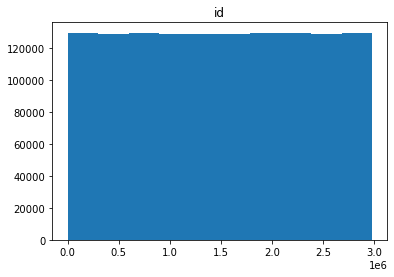

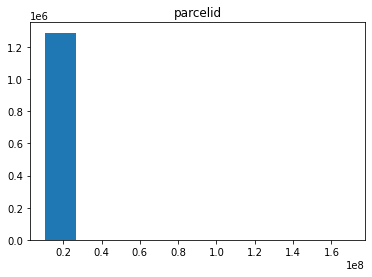

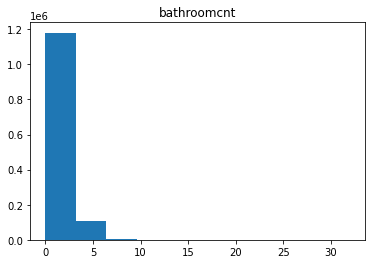

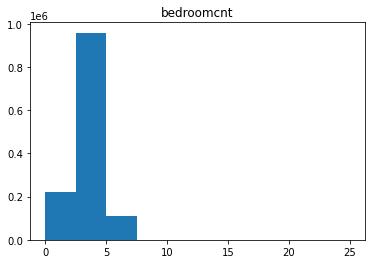

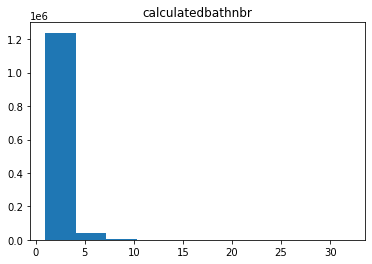

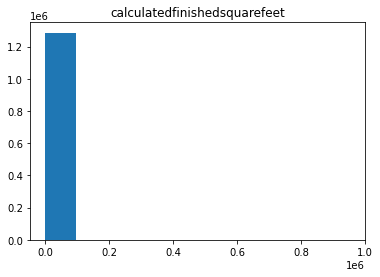

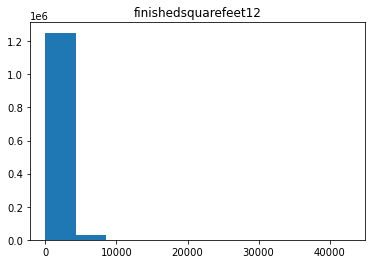

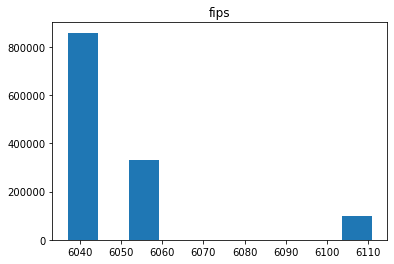

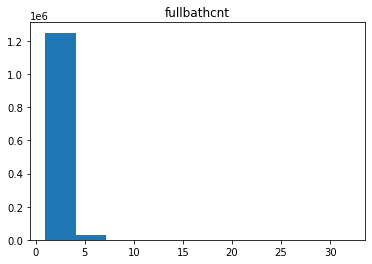

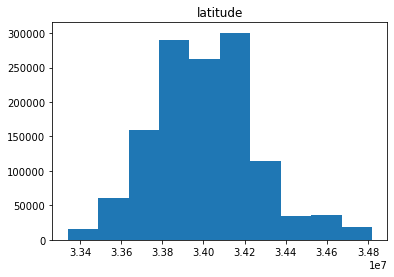

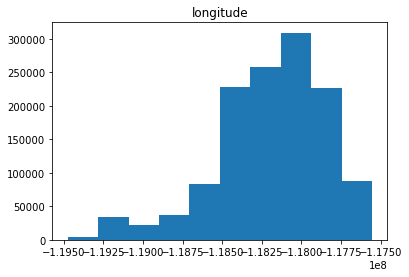

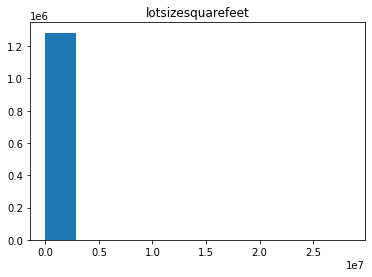

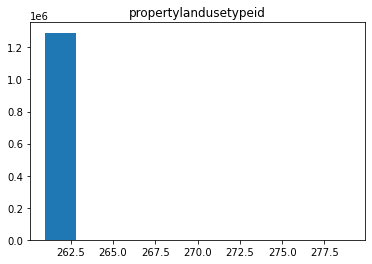

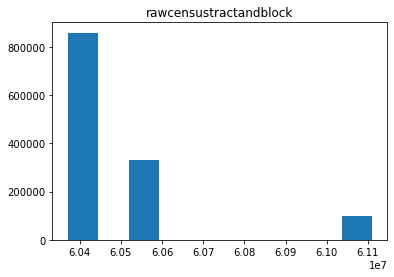

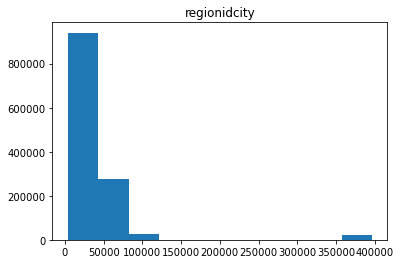

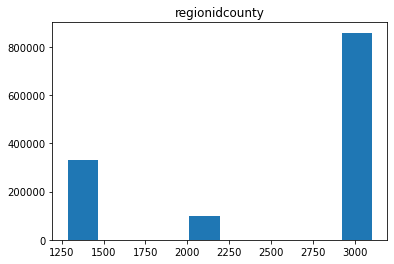

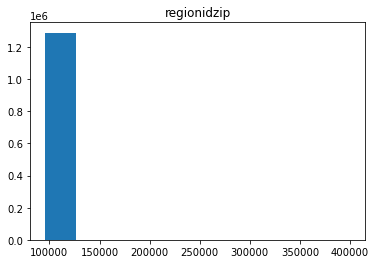

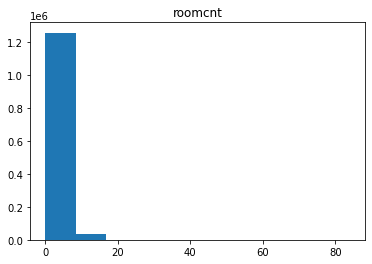

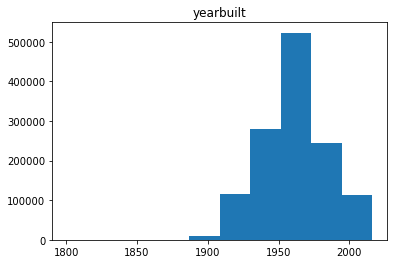

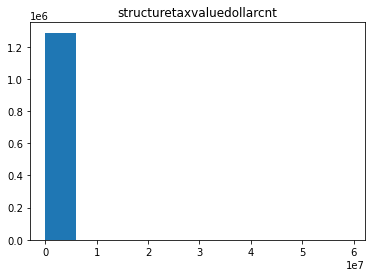

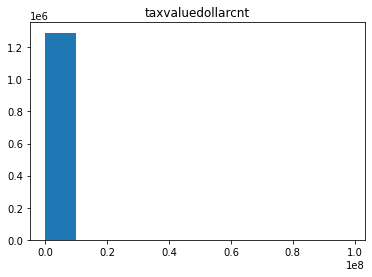

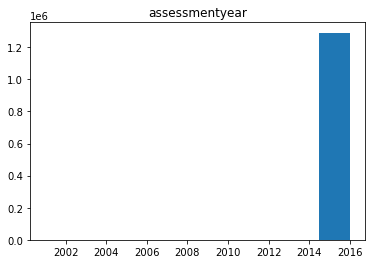

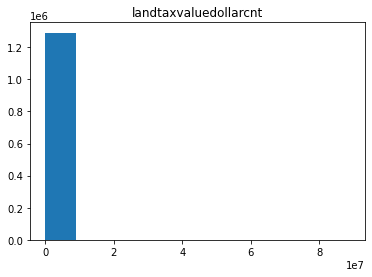

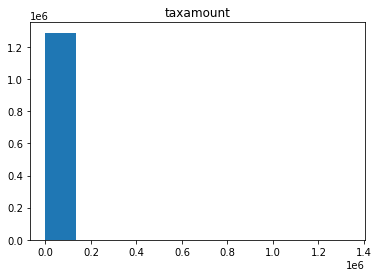

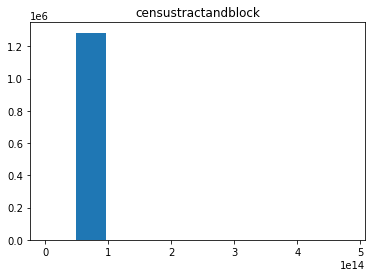

In [46]:
num_cols = train.columns[[(train[col].dtype == 'int64') | (train[col].dtype == 'float') for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Write supporting functions here
def run():
    print("Prepare: Cleaning acquired data...")
    # Write code here
    print("Prepare: Completed!")
def prepare_zillow(df):
    '''
    Signature: prepare_zillow(df) -> pandas.core.frame.DataFrame
    Docstring:
    Prepare the zillow dataset for data EDA
    Return DataFrame of zillow dataset
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
    df is the Zillow dataset stored as `zillow.csv`
    Returns
    -------
    DataFrame of the zillow dataset
    Examples
    --------
    To copy the code hold ALT + SHIFT and drag your cursor from the first line to the last.
    df = pd.read_csv('./data/raw/zillow.csv')
    
    nulls = df.isnull().sum()
    non_nulls = df.notnull().sum()
    total_values = nulls + non_nulls
    pct_missing = (nulls/total_values).sort_values(ascending=False)
    pct_missing_chart = pct_missing.apply("{0:.2%}".format)
    
    print('Percentage of values missing per column')
    print('-' * 39)
    print(f"{pct_missing_chart}")
    '''
    # 1. Drop columns with missing values
    # Calculate the number of missing values and non-null values.
    nulls = df.isnull().sum()
    non_nulls = df.notnull().sum()
    # Get the total number values in each column.
    total_values = nulls + non_nulls
    # Create a variable to store the percentage of missing values in each column.
    # .3358 is a hard coded value from the original analysis.
    # To reproduce use the code in the docstring
    pct_missing = nulls/total_values
    columns_to_drop = pct_missing[pct_missing > .3358].index.to_list()
    # drop columns missing more than 33.58% of data.
    df = df.drop(columns=columns_to_drop)
    # drop duplicate columns and index column
    duplicate_columns_to_drop = ['calculatedbathnbr', 'finishedsquarefeet12', 'id']
    df = df.drop(columns=duplicate_columns_to_drop)
    # Filter columns for single family residences.
    df = df[df.propertylandusetypeid.isin([261, 262, 273, 279])]

    return df

In [52]:
df = prepare_zillow(df)
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
1,10759547,0.0,0.0,NaN,6037.0,NaN,34140430.0,-118625364.0,4083.0,0109,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
15,11193347,0.0,0.0,NaN,6037.0,NaN,34585014.0,-118162010.0,11975.0,0100,...,3101.0,97329.0,0.0,NaN,NaN,10.0,2016.0,10.0,NaN,NaN
16,11215747,0.0,0.0,NaN,6037.0,NaN,34563376.0,-118019104.0,9403.0,0100,...,3101.0,97330.0,0.0,NaN,NaN,10.0,2016.0,10.0,NaN,NaN
17,11229347,0.0,0.0,NaN,6037.0,NaN,34526913.0,-118050581.0,3817.0,0100,...,3101.0,97330.0,0.0,NaN,NaN,2108.0,2016.0,2108.0,174.21,NaN
20,11324547,2.0,4.0,3633.0,6037.0,2.0,34560018.0,-118169806.0,9826.0,0100,...,3101.0,97329.0,0.0,2005.0,222321.0,296425.0,2016.0,74104.0,6941.39,NaN


In [50]:
import wrangle
help(wrangle)

Help on module wrangle:

NAME
    wrangle

FUNCTIONS
    add_encoded_columns(df, drop_encoders=True)
        Signature: add_encoded_columns(df, drop_encoders=True)
        Docstring:
        This function accepts a DataFrame, creates encoded columns for object dtypes,
        and returns a DataFrame with or without object dtype columns.
        
        Parameters
        ----------
        df : pandas.core.frame.DataFrame
        
        
        Returns
        -------
        f, encoded_columns
    
    add_scaled_columns(X_train, X_validate, X_test, scaler=MinMaxScaler())
        Signature: add_scaled_columns(train, validate, test, scaler)
        Docstring:
        
        Parameters
        ----------
        pandas.core.frame.DataFrame
        
        
        Returns
        -------
        X_train, X_validate, X_test
    
    attributes_target_split(data_set, target_name)
        Signature: attributes_target_split(df, target)
        Docstring:
        
        Parameters
 

In [53]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.wrangle_data(df, 'taxvaluedollarcnt', modeling=False)
X_train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,...,propertycountylandusecode_2,propertycountylandusecode_300V,propertycountylandusecode_5,propertycountylandusecode_5011,propertycountylandusecode_590V,propertycountylandusecode_8800,propertycountylandusecode_880V,propertycountylandusecode_9000,propertycountylandusecode_9100,propertycountylandusecode_SFR
573673,12266744,1.0,2.0,938.0,6037.0,1.0,33909182.0,-118244971.0,4471.0,261.0,...,0,0,0,0,0,0,0,0,0,0
2803666,76914535,0.0,0.0,NaN,6037.0,NaN,34399303.0,-118489982.0,NaN,261.0,...,0,0,0,0,0,0,0,0,0,0
929164,11672035,4.0,4.0,4252.0,6037.0,4.0,34068505.0,-118552542.0,15225.0,261.0,...,0,0,0,0,0,0,0,0,0,0
1793439,11317254,2.0,4.0,1640.0,6037.0,2.0,34684831.0,-118239582.0,8145.0,261.0,...,0,0,0,0,0,0,0,0,0,0
1634715,12787445,2.0,3.0,1546.0,6037.0,2.0,33971605.0,-118029768.0,6687.0,261.0,...,0,0,0,0,0,0,0,0,0,0
